# **Week 2**
### Josh Winnes
### Topics in Data Science
### September 10, 2024
##### (Due: Tuesday, September 17)

---
---

## **Data Setup**

In [16]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns
import os

import sys

# Specify the path to the directory containing your script
script_directory = '/Users/joshwinnes/Library/Mobile Documents/com~apple~CloudDocs/Wheaton College/fall 2024/topics in data science/Math485/packages'
sys.path.append(script_directory)

# Now you can import your script
import dhs_util
from dhs_util import * 

os.chdir('/Users/joshwinnes/Library/Mobile Documents/com~apple~CloudDocs/Wheaton College/fall 2024/topics in data science/data')
df = pd.read_csv('dhs_service_records_synthesized_final.csv')

df = dhs_preprocessing(df)
df, service_map = add_service_label(df)
df = add_age_bin(df)

recipient = get_recipient_attribute(df)

/Users/joshwinnes/Library/Mobile Documents/com~apple~CloudDocs/Wheaton College/fall 2024/topics in data science/Math485/packages/dhs_util.py:42: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  recipient = df.groupby(df['id'].cat.remove_unused_categories()).agg(


In [17]:
df.head()

,id,date,service,age,gender,race,ethnicity,marital,education,month,serv,age_bin
0,1626,2021-01-31,Children_Attending_Early_Childhood_Programs_Ma...,5,1~Male,1~White,99~Unknown,99~Unknown,9-12~High School (grade 9-12),January,S01,0-9
1,1626,2021-02-28,Children_Attending_Early_Childhood_Programs_Ma...,5,1~Male,1~White,99~Unknown,99~Unknown,9-12~High School (grade 9-12),February,S01,0-9
2,1626,2021-03-31,Children_Attending_Early_Childhood_Programs_Ma...,5,1~Male,1~White,99~Unknown,99~Unknown,9-12~High School (grade 9-12),March,S01,0-9
3,1626,2021-04-30,Children_Attending_Early_Childhood_Programs_Ma...,5,1~Male,1~White,99~Unknown,99~Unknown,9-12~High School (grade 9-12),April,S01,0-9
4,1626,2021-05-31,Children_Attending_Early_Childhood_Programs_Ma...,5,1~Male,1~White,99~Unknown,99~Unknown,9-12~High School (grade 9-12),May,S01,0-9


In [18]:
recipient.head()

,id,num_service,distinct_service,first_date,last_date,num_month,distinct_month,age,gender,race,ethnicity,marital,education,serv,age_bin
0,1,12,1,2021-01-31,2021-12-31,12,12,13,1~Male,99~Unknown,2~Not Hispanic/Latinx,99~Unknown,GED~High School Diploma/GED Completed,S12,10-19
12,2,1,1,2021-02-28,2021-02-28,1,1,70,2~Female,1~White,2~Not Hispanic/Latinx,2~Married,99~Unknown,S12,70-79
13,3,11,1,2021-02-28,2021-12-31,11,11,29,2~Female,1~White,2~Not Hispanic/Latinx,2~Married,9-12~High School (grade 9-12),S12,20-29
24,4,4,1,2021-03-31,2021-12-31,4,4,4,2~Female,1~White,2~Not Hispanic/Latinx,1~Single-Never Married,9-12~High School (grade 9-12),S12,0-9
28,5,12,1,2021-01-31,2021-12-31,12,12,40,1~Male,2~Black/African American,2~Not Hispanic/Latinx,2~Married,UNDERGRAD~Some College,S12,40-49


---
---

## **In Class Exercises**

### ***Tuesday, September 10, 2024***

### Exercise 1: How many recipients receive services every month in the year? 

In [19]:
recipient.query("distinct_month == 12 and num_service > 0").count()

id                  421900
num_service         421900
distinct_service    421900
first_date          421900
last_date           421900
num_month           421900
distinct_month      421900
age                 421900
gender              421900
race                421900
ethnicity           421900
marital             421900
education           421900
serv                421900
age_bin             421900
dtype: int64

We see that **421,900** recipients receive at least 1 service in every month.

### Exercise 2: What is the average number of services a recipient use? 

In [20]:
recipient['num_service'].mean()

13.331111523251261

Recipients use, on average, **13.331** services

### Exercise 3: If we remove the recipients who uses only one service in the year, what are the answers to the above questions?

In [21]:
recipient_more_than_one = recipient.query("num_service != 1").reset_index()
recipient_more_than_one.head()

,index,id,num_service,distinct_service,first_date,last_date,num_month,distinct_month,age,gender,race,ethnicity,marital,education,serv,age_bin
0,0,1,12,1,2021-01-31,2021-12-31,12,12,13,1~Male,99~Unknown,2~Not Hispanic/Latinx,99~Unknown,GED~High School Diploma/GED Completed,S12,10-19
1,13,3,11,1,2021-02-28,2021-12-31,11,11,29,2~Female,1~White,2~Not Hispanic/Latinx,2~Married,9-12~High School (grade 9-12),S12,20-29
2,24,4,4,1,2021-03-31,2021-12-31,4,4,4,2~Female,1~White,2~Not Hispanic/Latinx,1~Single-Never Married,9-12~High School (grade 9-12),S12,0-9
3,28,5,12,1,2021-01-31,2021-12-31,12,12,40,1~Male,2~Black/African American,2~Not Hispanic/Latinx,2~Married,UNDERGRAD~Some College,S12,40-49
4,40,6,24,3,2021-01-31,2021-12-31,24,12,71,2~Female,2~Black/African American,2~Not Hispanic/Latinx,1~Single-Never Married,99~Unknown,S09,70-79


In [22]:
recipient_more_than_one.query("distinct_month == 12 and num_service > 0").count()

index               421900
id                  421900
num_service         421900
distinct_service    421900
first_date          421900
last_date           421900
num_month           421900
distinct_month      421900
age                 421900
gender              421900
race                421900
ethnicity           421900
marital             421900
education           421900
serv                421900
age_bin             421900
dtype: int64

There are still **421,900** recipients who receive services every month, which makes sense because if they receive service every month, then they would have more than 1 service in the year and would not have been dropped.

In [23]:
recipient_more_than_one['num_service'].mean()

13.631203741194396

The mean jumped slightly to **13.631** services per recipient when we ignore the recipients who only received 1 service.

### Exercise 4: From all the plots, can we conclude that there is little difference in the number of services used between different age/gender/race groups?

---

### ***Thursday, September 12, 2024***

### Exercise 1: Build you own module of helper functions, store in file, and import into your main notebook for use

In [31]:
import week2_util as util

### Exercise 2: Think about the behavior cohorts
- can we conclude that income services combined with other services helps recipients reduce their reliance on income support overtime?
- does the conclusion make sense? i.e., can the conclusions be reasonably explained by cross validation with other data view? 
 

### Exercise 3: Check out pandas.crosstab https://pandas.pydata.org/docs/reference/api/pandas.crosstab.html#pandas.crosstab , see if you can prodce a table with service as row and race and gender as columns 

---
---

## **Homework**

### Exercise 1
- Choose a pair or multiple behavior cohorts of recipients based on a set of behavior criteria that you think may be of importance (to the works done at DHS)
    - e.g., recipients who received mental health service (S14) vs. those who did not
    - e.g., recipients who received mental health service AND income support vs. those who received mental health support only (or the other way around) etc. 
- prepare the analysis file for cohort analysis on your cohorts
- produce an analysis to answer questions that you think may be insightful
    - e.g., what are the demographic differences between the cohorts
    - e.g., are there common services (other than income support) that the cohorts have in common 
- what are some similarities between the cohorts


In [24]:
for i in df['service'].unique(): print(i)

Children_Attending_Early_Childhood_Programs_Managed_by_DHS
Children_in_Care
Children_Receiving_Child_Welfare_Services
Children_Receiving_DHS_Funded_Out_of_School_Programs
Children_Receiving_Early_Intervention_Services
Families_Receiving_Child_Welfare_Services
Homeless_Population
Homicides
Individuals_Receiving_DHS_Services
Individuals_Receiving_Family_Strengthening_Programs
Individuals_Receiving_Homelessness_and_Housing_Services
Individuals_Receiving_Income_Supports
Individuals_Receiving_Intellectual_Disability_Services
Individuals_Receiving_Mental_Health_Services
Individuals_Receiving_Substance_Use_Disorder_Services
Involuntary_Commitments
Jail_Population
Mental_Health_Crises
Older_Adults_Receiving_Services
Overdoses
Parents_Receiving_Child_Welfare_Services
Suicides


Based on the options listed above, I want to investigate children receiving Children in Care services AND Mental Health Crises Services.

In [25]:
df_temp =df[["id","serv"]].merge(df[["id","serv"]], on="id",how="inner")

In [26]:
service_map

{'Children_Attending_Early_Childhood_Programs_Managed_by_DHS': 'S01',
 'Children_in_Care': 'S02',
 'Children_Receiving_Child_Welfare_Services': 'S03',
 'Children_Receiving_DHS_Funded_Out_of_School_Programs': 'S04',
 'Children_Receiving_Early_Intervention_Services': 'S05',
 'Families_Receiving_Child_Welfare_Services': 'S06',
 'Homeless_Population': 'S07',
 'Homicides': 'S08',
 'Individuals_Receiving_DHS_Services': 'S09',
 'Individuals_Receiving_Family_Strengthening_Programs': 'S10',
 'Individuals_Receiving_Homelessness_and_Housing_Services': 'S11',
 'Individuals_Receiving_Income_Supports': 'S12',
 'Individuals_Receiving_Intellectual_Disability_Services': 'S13',
 'Individuals_Receiving_Mental_Health_Services': 'S14',
 'Individuals_Receiving_Substance_Use_Disorder_Services': 'S15',
 'Involuntary_Commitments': 'S16',
 'Jail_Population': 'S17',
 'Mental_Health_Crises': 'S18',
 'Older_Adults_Receiving_Services': 'S19',
 'Overdoses': 'S20',
 'Parents_Receiving_Child_Welfare_Services': 'S21',


In [27]:
cohort = df_temp.query('serv_x == "S02" and serv_y == "S18"')
cohort_unique = cohort.drop_duplicates()

In [28]:
cohort_unique

,id,serv_x,serv_y
136299,639,S02,S18
151106,3283,S02,S18
154598,3891,S02,S18
184177,7863,S02,S18
192881,8544,S02,S18
...,...,...,...
4226448,503589,S02,S18
4241216,506324,S02,S18
4315270,520201,S02,S18
4396235,530370,S02,S18


In [29]:
ids = cohort_unique['id']
cohort_full = recipient[recipient['id'].isin(ids)]
cohort_full

,id,num_service,distinct_service,first_date,last_date,num_month,distinct_month,age,gender,race,ethnicity,marital,education,serv,age_bin
8487,639,61,6,2021-01-31,2021-12-31,61,12,16,2~Female,2~Black/African American,2~Not Hispanic/Latinx,99~Unknown,9-12~High School (grade 9-12),S02,10-19
43665,3283,46,7,2021-01-31,2021-12-31,46,12,15,1~Male,2~Black/African American,2~Not Hispanic/Latinx,1~Single-Never Married,99~Unknown,S02,10-19
51708,3891,53,7,2021-01-31,2021-12-31,53,12,15,2~Female,2~Black/African American,2~Not Hispanic/Latinx,99~Unknown,GED~High School Diploma/GED Completed,S02,10-19
104122,7863,54,6,2021-01-31,2021-12-31,54,12,13,1~Male,2~Black/African American,2~Not Hispanic/Latinx,99~Unknown,9-12~High School (grade 9-12),S02,10-19
113346,8544,42,6,2021-01-31,2021-12-31,42,12,9,2~Female,2~Black/African American,2~Not Hispanic/Latinx,1~Single-Never Married,99~Unknown,S02,0-9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6698482,503589,59,6,2021-01-31,2021-12-31,59,12,15,2~Female,2~Black/African American,2~Not Hispanic/Latinx,1~Single-Never Married,9-12~High School (grade 9-12),S02,10-19
6734257,506324,61,6,2021-01-31,2021-12-31,61,12,16,2~Female,2~Black/African American,1~Hispanic/Latinx,1~Single-Never Married,9-12~High School (grade 9-12),S02,10-19
6912465,520201,48,6,2021-01-31,2021-12-31,48,12,0,1~Male,1~White,2~Not Hispanic/Latinx,1~Single-Never Married,99~Unknown,S02,0-9
7047289,530370,68,7,2021-01-31,2021-12-31,68,12,0,1~Male,1~White,2~Not Hispanic/Latinx,99~Unknown,99~Unknown,S02,0-9


Text(0.5, 9.444444444444438, 'Age')

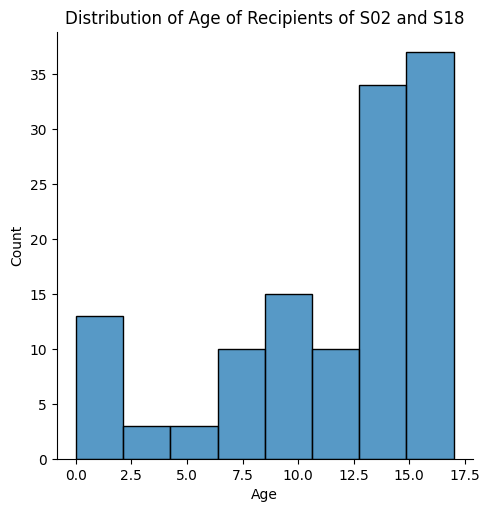

In [30]:
import matplotlib.pyplot as plt

sns.displot(cohort_full, x = 'age', kind = 'hist')

plt.title('Distribution of Age of Recipients of S02 and S18')
plt.ylabel('Count')
plt.xlabel('Age')

In [46]:
df_S02 = df[df['serv']=='S02']
df_S02

,id,date,service,age,gender,race,ethnicity,marital,education,month,serv,age_bin
2302,309,2021-01-31,Children_in_Care,13,1~Male,1~White,2~Not Hispanic/Latinx,1~Single-Never Married,99~Unknown,January,S02,10-19
2303,309,2021-02-28,Children_in_Care,13,1~Male,1~White,2~Not Hispanic/Latinx,1~Single-Never Married,99~Unknown,February,S02,10-19
2304,309,2021-03-31,Children_in_Care,13,1~Male,1~White,2~Not Hispanic/Latinx,1~Single-Never Married,99~Unknown,March,S02,10-19
2305,309,2021-04-30,Children_in_Care,13,1~Male,1~White,2~Not Hispanic/Latinx,1~Single-Never Married,99~Unknown,April,S02,10-19
2306,309,2021-05-31,Children_in_Care,13,1~Male,1~White,2~Not Hispanic/Latinx,1~Single-Never Married,99~Unknown,May,S02,10-19
...,...,...,...,...,...,...,...,...,...,...,...,...
20739,535125,2021-07-31,Children_in_Care,5,2~Female,2~Black/African American,2~Not Hispanic/Latinx,1~Single-Never Married,9-12~High School (grade 9-12),July,S02,0-9
20740,535125,2021-08-31,Children_in_Care,5,2~Female,2~Black/African American,2~Not Hispanic/Latinx,1~Single-Never Married,9-12~High School (grade 9-12),August,S02,0-9
20741,535200,2021-02-28,Children_in_Care,5,1~Male,2~Black/African American,2~Not Hispanic/Latinx,99~Unknown,9-12~High School (grade 9-12),February,S02,0-9
20742,535200,2021-03-31,Children_in_Care,5,1~Male,2~Black/African American,2~Not Hispanic/Latinx,99~Unknown,9-12~High School (grade 9-12),March,S02,0-9


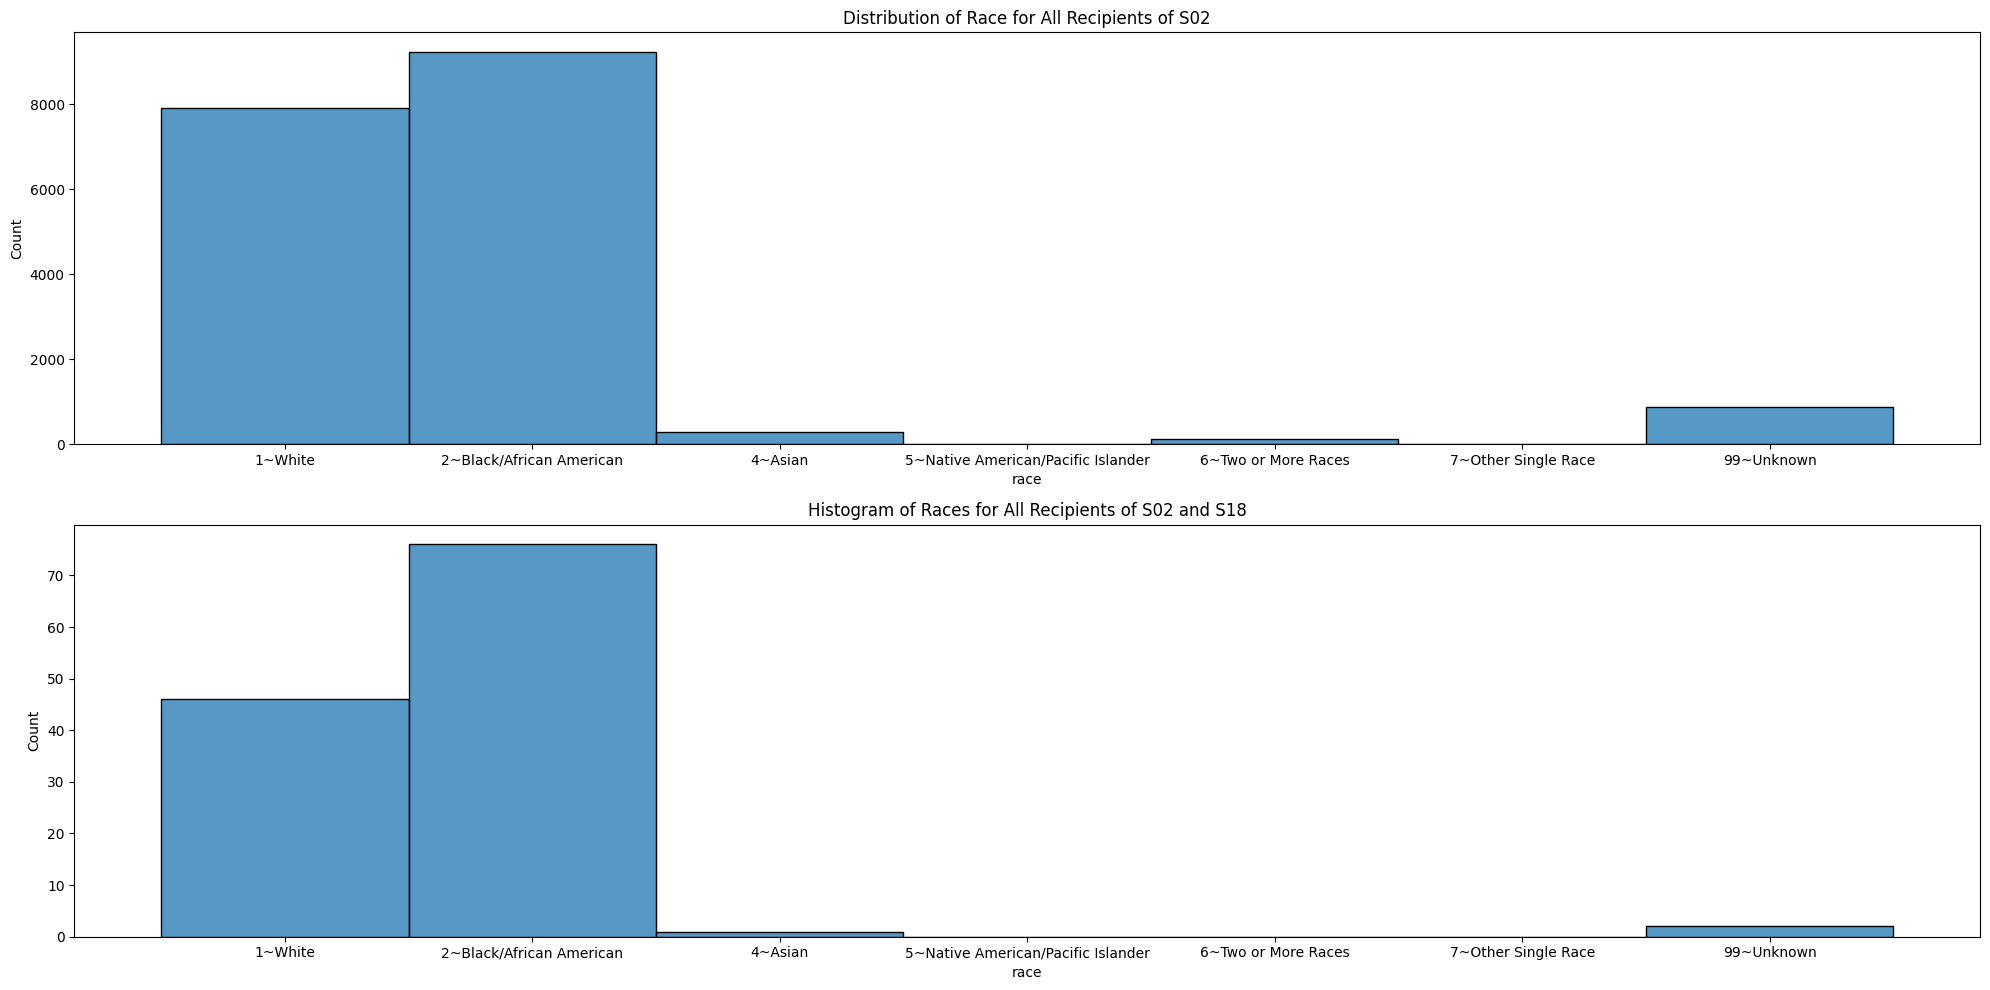

In [49]:
fig, ax = plt.subplots(2, 1, figsize=(20, 10))  # 1 row, 2 columns

sns.histplot(data=df_S02, x='race', ax=ax[0])
ax[0].set_title('Distribution of Race for All Recipients of S02')

sns.histplot(data=cohort_full, x='race', ax=ax[1])
ax[1].set_title('Histogram of Races for All Recipients of S02 and S18')

plt.tight_layout()
plt.show()

In [ ]:
9